In [1]:
import pandas as pd
data = pd.read_parquet('data/train_series.parquet')
labels = pd.read_csv('data/train_events.csv')

stepNumber = 24 * 60 * 60 / 5

In [2]:
print(stepNumber)

17280


In [48]:
#gets data from a 24 hour period 
#returns data in the format: dataframe, onset, wakeup
def getNightData(id, numNight):
    dataIndividual = data[data["series_id"] == id]
    labelsIndividual = labels[labels["series_id"] == id]
    step = []
    timestamp = []
    anglez = []
    enmo = []

    for i in range(stepNumber * (numNight - 1), stepNumber * numNight):
        #frame = pd.DataFrame({"step":[int(dataIndividual["step"][i])], "timestamp":[dataIndividual["timestamp"][i]], "anglez":[dataIndividual["anglez"][i]], "enmo":[dataIndividual["enmo"][i]]})
        step.append([dataIndividual["step"][i]])
        timestamp.append([dataIndividual["timestamp"][i]])
        anglez.append([dataIndividual["anglez"][i]])
        enmo.append([dataIndividual["enmo"][i]])
        
    dframe = pd.DataFrame({"step":step, "timestamp":timestamp, "anglez":anglez, "enmo":enmo}), labelsIndividual["step"][numNight * 2 - 2], labelsIndividual["step"][numNight * 2 - 1]

    return dframe



In [22]:
print(getNightData("038441c925bb", 2))

(          step                   timestamp      anglez      enmo
0      [17280]  [2018-08-15T15:30:00-0400]   [-9.9711]  [0.0583]
1      [17281]  [2018-08-15T15:30:05-0400]   [-7.7901]  [0.1688]
2      [17282]  [2018-08-15T15:30:10-0400]    [1.3154]  [0.0809]
3      [17283]  [2018-08-15T15:30:15-0400]  [-17.8598]  [0.0269]
4      [17284]  [2018-08-15T15:30:20-0400]  [-13.3551]  [0.0281]
...        ...                         ...         ...       ...
17275  [34555]  [2018-08-16T15:29:35-0400]  [-15.2157]  [0.3733]
17276  [34556]  [2018-08-16T15:29:40-0400]    [3.8922]  [0.0812]
17277  [34557]  [2018-08-16T15:29:45-0400]   [36.6152]  [0.0044]
17278  [34558]  [2018-08-16T15:29:50-0400]   [39.0237]  [0.0005]
17279  [34559]  [2018-08-16T15:29:55-0400]   [39.1948]  [0.0021]

[17280 rows x 4 columns], 20244.0, 27492.0)


In [73]:
import matplotlib.pyplot as plt

def graphNight(id, night):
    data, onset, wakeup = getNightData(id, night)

    plt.figure(figsize=(15, 2.5))
    figure, axis = plt.subplots(2, 1)

    axis[0].plot(list(data["step"]), list(data["enmo"]))
    axis[0].axvline(x=onset, color='r', linestyle='--')
    axis[0].axvline(x=wakeup, color='y', linestyle='--')
    axis[0].set_title("enmo")

    axis[1].plot(list(data["step"]), list(data["anglez"]), label="anglez")
    axis[1].axvline(x=onset, color='r', linestyle='--')
    axis[1].axvline(x=wakeup, color='y', linestyle='--')
    axis[1].set_title("anglez")

    plt.show()

<Figure size 1500x250 with 0 Axes>

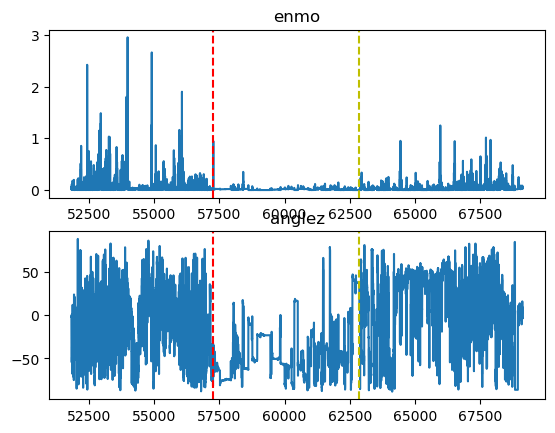

In [74]:
graphNight("038441c925bb", 4)